# Arbeidsark: ANOVA og bivariat regresjonsanalyse i Python

## Målsetninger:
- Laste inn et datasett fra en CSV-fil
- Utføre og tolke:
  - Analyse av Varians (ANOVA)
  - Bivariat Regressjonsanalyse
  - Formelle tester for forutsetninger
- Visualisere resultater for bedre tolkning

## Oppgaver for modulen 
- Last inn datasettet og undersøk strukturen ved hjelp av .head() og .info().
- Utfør ANOVA for å sammenligne gjennomsnitt på tvers av kategorier for en numerisk variabel.
- Tilpass en bivariat regresjonsmodell og tolk resultatene.
- Test forutsetningene for regresjon:
    - Lineæritet
    - Normalitet av residualer
    - Homoskedastisitet
- Visualiser resultatene ved hjelp av spredningsplott, boksplott og histogrammer.
- Tolk funnene og diskuter betydningen av resultatene.

### Aller første du må gjøre, er å importere biblioteker som skal brukes

In [3]:
# Steg 1: Importer nødvendige biblioteker
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, shapiro
from statsmodels.formula.api import ols
import statsmodels.api as sm



## 1. Last inn datasettet
(Husk å kjør koden i data-cellene for å få resultater. Dette gjøres ved å sette markøren i cellen, og enten klikke [ctrl]+[enter] på tastaturet, eller klikke "play" knappen på menyen over.

In [6]:
# Last inn datasettet fra en CSV-fil
# Bytt ut 'your_file.csv' med filstien til datasettet ditt
file_path = 'Data/HRGender.csv'
data = pd.read_csv(file_path)

# Vis de første radene i datasettet
data.head()

,jobTitle,gender,age,perfEval,edu,dept,seniority,basePay,bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319


## 1b: Still noen forskningsspørsmål
Se på variablene, og lag noen aktuelle forsknignsspørsmål. Husk på kravene til gode spørsmål. 
Et slik kan være: "Er det forskjell på lønn for menn og kvinner?" 

### skriv inn spørsmål her: 

......


## 2. Analyse av Varians (ANOVA)
ANOVA brukes til å sammenligne gjennomsnitt på tvers av flere grupper for en numerisk variabel.

### oppgave:
Utfør ANOVA for å sammenligne gjennomsnitt på tvers av kategorier for en numerisk variabel.


ANOVA-resultater: F-statistikk = 28.902495553992495, P-verdi = 9.478621943016345e-08
Det er en statistisk signifikant forskjell mellom gruppene.


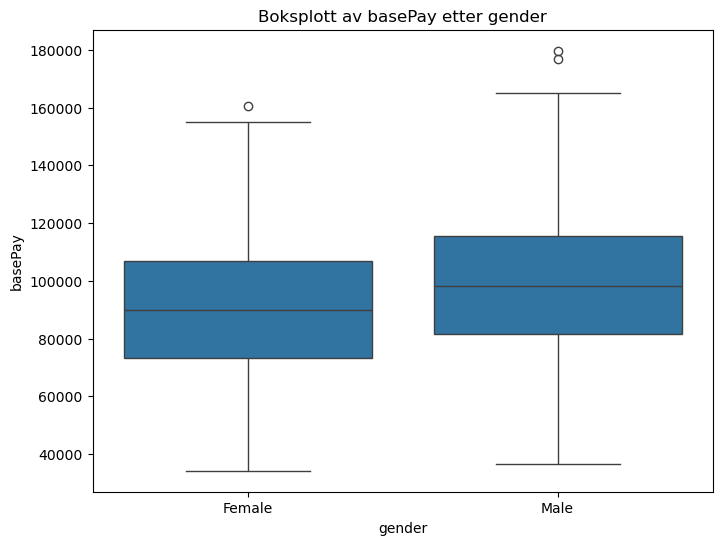

In [7]:
# Utfør ANOVA
# Bytt ut 'numerical_column' med den numeriske variabelen og 'group_column' med gruppenavnet
numerical_column = 'basePay'
group_column = 'gender'

# Grupper data etter den kategoriske variabelen
groups = [group[numerical_column].dropna() for name, group in data.groupby(group_column)]

# Utfør enveis ANOVA
f_stat, p_value = f_oneway(*groups)

print(f"ANOVA-resultater: F-statistikk = {f_stat}, P-verdi = {p_value}")

# Tolkning
if p_value < 0.05:
    print("Det er en statistisk signifikant forskjell mellom gruppene.")
else:
    print("Det er ingen statistisk signifikant forskjell mellom gruppe.")

# Visualiser gruppe snittene
plt.figure(figsize=(8, 6))
sns.boxplot(x=group_column, y=numerical_column, data=data)
plt.title(f"Boksplott av {numerical_column} etter {group_column}")
plt.xlabel(group_column)
plt.ylabel(numerical_column)
plt.show()

## 3. Bivariat Regressjonsanalyse
Tilpasning av Regressjonsmodellen
### oppgave:
Tilpass en bivariat regresjonsmodell og tolk resultatene.

In [10]:
# Tilpass en regresjonsmodell
# Bytt ut 'y_column' med avhengig variabel og 'x_column' med uavhengig variabel
y_column = 'basePay'
x_column = 'age'

# Lag og tilpass regresjonsmodellen
X = sm.add_constant(data[x_column])  # Legg til konstant for skjæringspunkt
model = sm.OLS(data[y_column], X).fit()

# Vis oppsummering av modellen
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                basePay   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     462.4
Date:                Wed, 22 Jan 2025   Prob (F-statistic):           1.41e-84
Time:                        23:11:23   Log-Likelihood:                -11368.
No. Observations:                1000   AIC:                         2.274e+04
Df Residuals:                     998   BIC:                         2.275e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.319e+04   2031.060     26.188      0.0

## 4. Test Forutsetningene for Regressjonsanalyse
- a) Lineæritet
- b) Normalitet av Residualer
- c) Homoskedastisitet

### oppgave:
Test forutsetningene for regresjon:
Lineæritet
Normalitet av residualer
Homoskedastisitet

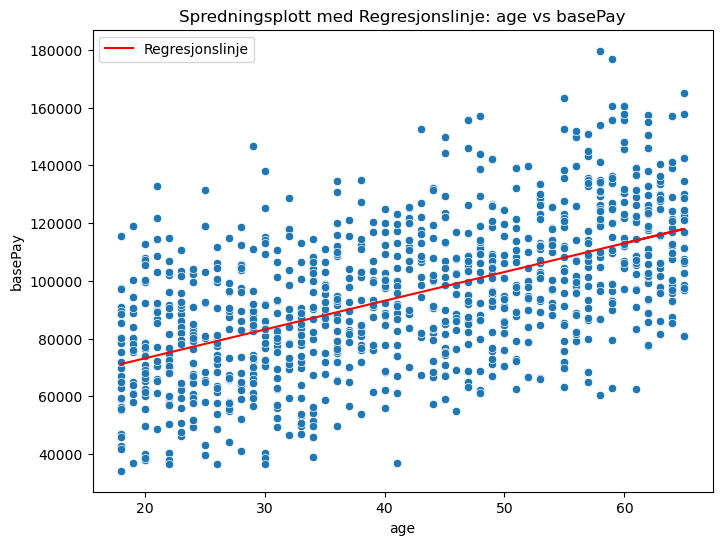

Shapiro-Wilk Test: Statistikk = 0.9962331652641296, P-verdi = 0.016063570976257324
Residualene er ikke normalfordelte.


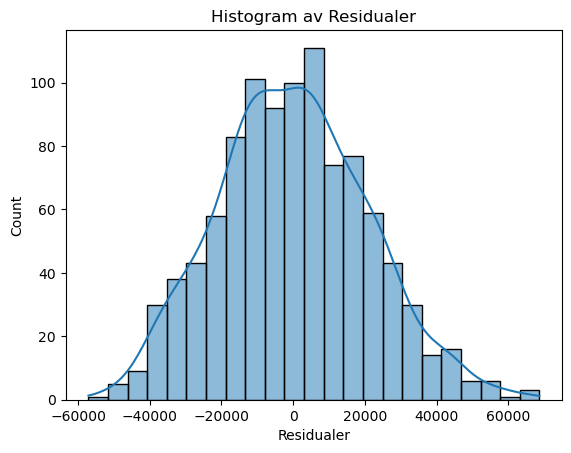

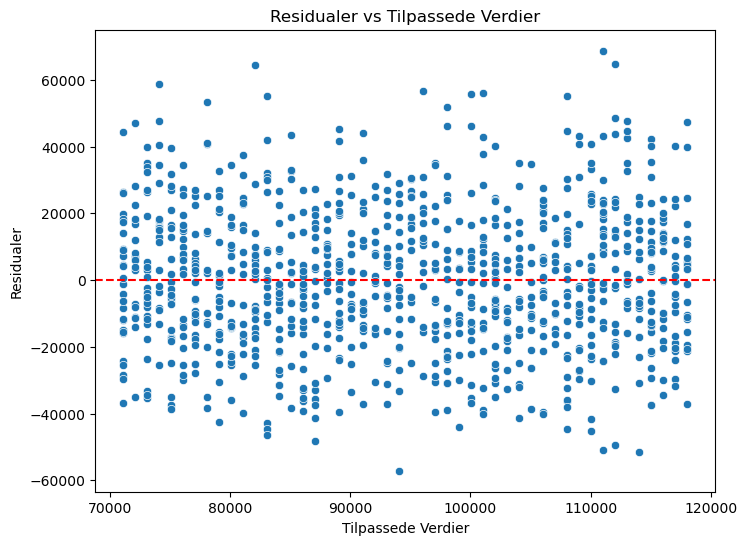

In [6]:
# Visualiser sammenhengen
# a) Lineæritet
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data[x_column], y=data[y_column])
plt.plot(data[x_column], model.fittedvalues, color='red', label='Regresjonslinje')
plt.title(f"Spredningsplott med Regresjonslinje: {x_column} vs {y_column}")
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.legend()
plt.show()

# Normalitet av Residualer
# Utfør Shapiro-Wilk test for normalitet av residualer
residuals = model.resid
stat, p_value = shapiro(residuals)

print(f"Shapiro-Wilk Test: Statistikk = {stat}, P-verdi = {p_value}")

if p_value < 0.05:
    print("Residualene er ikke normalfordelte.")
else:
    print("Residualene er normalfordelte.")

# Visualiser residualene
sns.histplot(residuals, kde=True)
plt.title("Histogram av Residualer")
plt.xlabel("Residualer")
plt.show()

# c) Homoskedastisitet
plt.figure(figsize=(8, 6))
sns.scatterplot(x=model.fittedvalues, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residualer vs Tilpassede Verdier")
plt.xlabel("Tilpassede Verdier")
plt.ylabel("Residualer")
plt.show()

## 5. Drøft innsikter
I analysene over, bør du ha fått noen innsikter fra analysene, og tolk visualiseringene. Presenter disse her: 
(Hint: hva ser du om sammenheng mellom forskjellige typer variabler: kategoriske, numeriske, m.m. om variablene du så på?)
Sørg for at du har svart på spørsmålene du stilte øverst. 

### Skriv svaret her
...